<a href="https://colab.research.google.com/github/nitinlodhi019/Deep-Learning/blob/main/Feature-Scaling/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Scaling

Feature scaling is a data preprocessing technique that transforms the numerical features in a dataset to a common scale or range. This process is important in machine learning because it ensures that all features contribute equally to the model, preventing some features from dominating the model's outcomes.

**Here are some feature scaling techniques:**

**Normalization**

Also known as min-max scaling, this technique transforms values to fall within a specific range, typically between 0 and 1. It's suitable when the distribution of the data does not follow a Gaussian distribution.

**Standardization**

This technique transforms features so that they have a mean of 0 and a standard deviation of 1. **Between -1 to 1.**

**Robust scaling**

This technique uses the median and the interquartile range for scaling, making it less sensitive to outliers.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
print(data.shape)
data.sample(10)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
361,15778830,Female,53,34000,1
294,15566689,Female,35,57000,0
146,15750839,Female,27,96000,1
106,15706185,Female,26,35000,0
41,15591915,Female,33,51000,0
341,15776844,Male,35,75000,0
264,15600379,Male,48,90000,1
155,15610140,Female,31,15000,0
241,15736228,Male,38,59000,0
115,15689237,Male,40,57000,0


In [13]:
data = data.iloc[:, 2:]
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

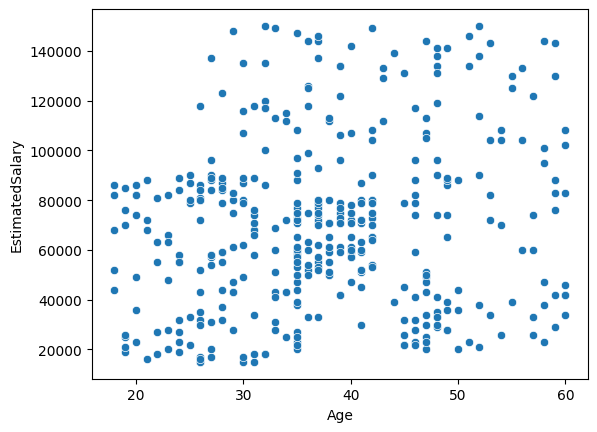

In [17]:
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1])

In [20]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

##Train model at Unnormalized data

In [24]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6316 - loss: 939.6765 - val_accuracy: 0.4000 - val_loss: 57.5976
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5942 - loss: 211.7582 - val_accuracy: 0.4000 - val_loss: 146.4010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3675 - loss: 91.5960 - val_accuracy: 0.6000 - val_loss: 165.8481
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5793 - loss: 85.0797 - val_accuracy: 0.4000 - val_loss: 12.9444
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4200 - loss: 29.9305 - val_accuracy: 0.4000 - val_loss: 54.6931
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4955 - loss: 45.3930 - val_accuracy: 0.6000 - val_loss: 13.1690
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4842 - loss: 25.5821 - val_accuracy: 0.4000 - val_loss: 106.2968
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4917 - loss: 98.2551 - val

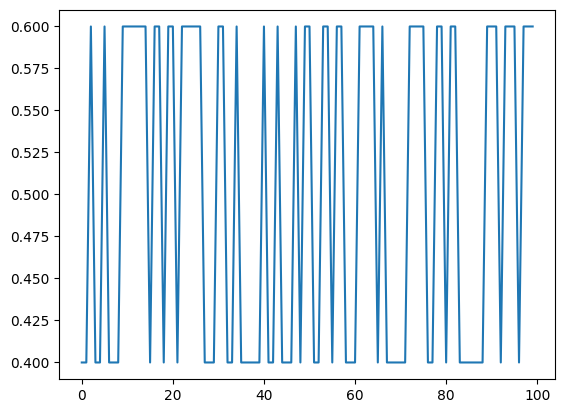

In [32]:
plt.plot(history.history['val_accuracy'])

##Train model at Normalized Data

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

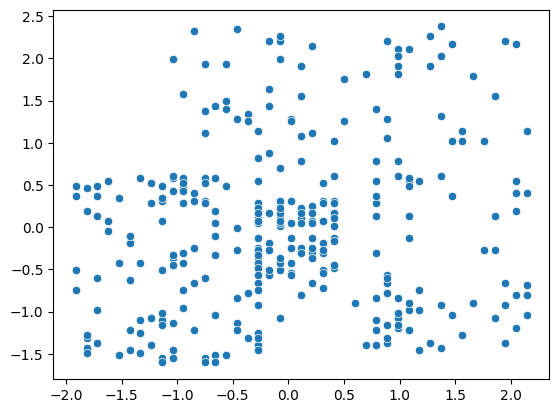

In [37]:
#we can see, not any chage in distribution after scaling
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:, 1])

In [38]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7204 - loss: 0.6554 - val_accuracy: 0.7750 - val_loss: 0.6022
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8024 - loss: 0.6038 - val_accuracy: 0.8500 - val_loss: 0.5530
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8086 - loss: 0.5622 - val_accuracy: 0.8500 - val_loss: 0.5104
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.5241 - val_accuracy: 0.8125 - val_loss: 0.4726
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8656 - loss: 0.4833 - val_accuracy: 0.8125 - val_loss: 0.4403
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8665 - loss: 0.4630 - val_accuracy: 0.8125 - val_loss: 0.4130
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8580 - loss: 0.4340 - val_accuracy: 0.8250 - val_loss: 0.3918
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8889 - loss: 0.3910 - val_accuracy: 0.8375 - 

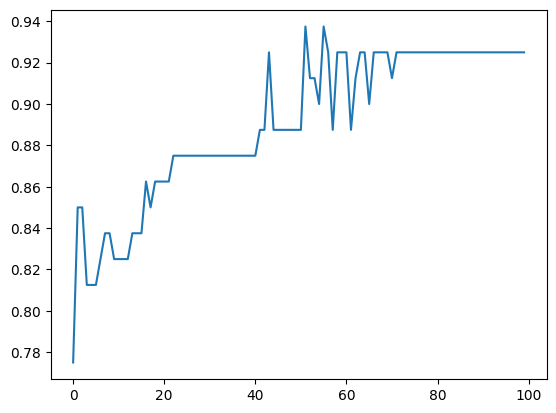

In [41]:
plt.plot(history.history['val_accuracy'])